# Module 09: *k*-Nearest Neighbors

**Student Name**: [Ivan Ng]

**Date**: [3/4/24]

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following:
Question 1. Load and Inspect the data

Question 2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 3. Evaluate the prediction accuracy of the k-nn model.

Question 4. Explore different metrics and data partitioning strategies.


### Submission Instructions

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Question 1: Inspect the data
In this question you will need to load the data (this was performed for you), inspect the distribution and pairwise relationships between the features. 

In [2]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [3]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]

print(df)

     sepal length  sepal width  petal length  petal width      class
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


### Question 1.1 (5 pts)
Obtain a statistical summary of the iris flowers sepal and petal features. Use the statistical summary, explain your observation about the iris flowers. Note: You can use the `describe()` function to display the statistical summary.

In [4]:
# Statistical summary for sepal features
sepal_df = df[['sepal length', 'sepal width', 'class']]
sepal_summary = sepal_df.describe()

print(sepal_summary)

       sepal length  sepal width
count    150.000000   150.000000
mean       5.843333     3.057333
std        0.828066     0.435866
min        4.300000     2.000000
25%        5.100000     2.800000
50%        5.800000     3.000000
75%        6.400000     3.300000
max        7.900000     4.400000


In [5]:
# Sepal lengths vary from approximately 4.3 to 7.9 units
# with an average length of 5.84 units
# Sepal widths range from approximately 2.0 to 4.4 units
# with an average width of 3.06 units
# Both sepal length and width have approximately symmetric distributions
# as displayed by the proportional standard deviation
# majority of sepal lengths and widths fall within a relatively narrow range
# as they have relatively compact quartile ranges

In [6]:
# Statistical summary for petal features
petal_df = df[['petal length', 'petal width', 'class']]
petal_summary = petal_df.describe()

print(petal_summary)

       petal length  petal width
count    150.000000   150.000000
mean       3.758000     1.199333
std        1.765298     0.762238
min        1.000000     0.100000
25%        1.600000     0.300000
50%        4.350000     1.300000
75%        5.100000     1.800000
max        6.900000     2.500000


In [7]:
# Petal lengths range from approximately 1.0 to 6.9 units
# with an average of 3.76 units
# Petal widths range from about 0.1 to 2.5 units
# averaging 1.20 units
# Both petal length and width distributions are right-skewed
# with the mean values pulled towards the lower ends by outliers

### Question 1.2 (10 pts)
Visualize and discuss the **distribution of each feature** and the **pairwise relationships between features**. Note: Ensure that you discuss the strength of the **correlation** between the features.

- Tip 1: the seaborn library has a pairplot visualization which is useful to display both the distribution of each feature and pairwise relationships.
- Tip 2: another useful visualization is called a correlation matrix. It can be used to visually display the strength of the correlation. 

C:\Users\Ivan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


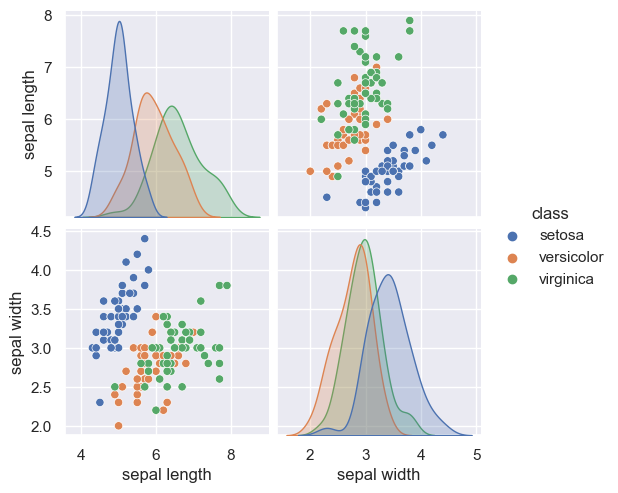

In [8]:
# Create a pairplot
sns.pairplot(sepal_df, hue='class')

In [9]:
# The different classes individually seem to have a good correlation.
# Together however, the correlation is not strong at all.
# Individually for the classes, the positive correlation is there.

<Axes: >

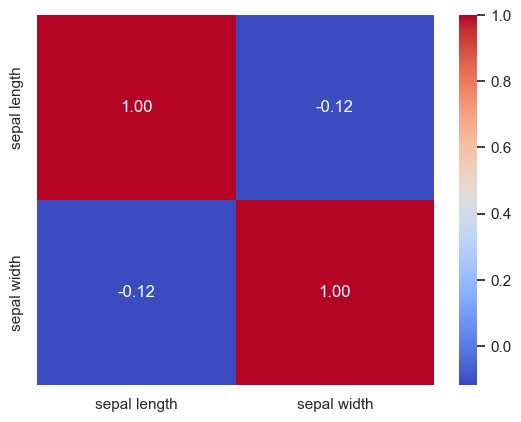

In [10]:
# Extract the subset of columns into sepal_df, excluding the 'class' column
sepal_stats = sepal_df[['sepal length', 'sepal width']]

# Calculate the correlation matrix, excluding the 'class' column
correlation_sepal_matrix = sepal_stats.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_sepal_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [11]:
# As expected, the correlation between the length and width is extremely weak.
# This is due to the fact that setosa species has a higher width to length
# ratio for the most part. This skews the calculation of the sepals overall
# and thus results in an extremely weak correlation.

C:\Users\Ivan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


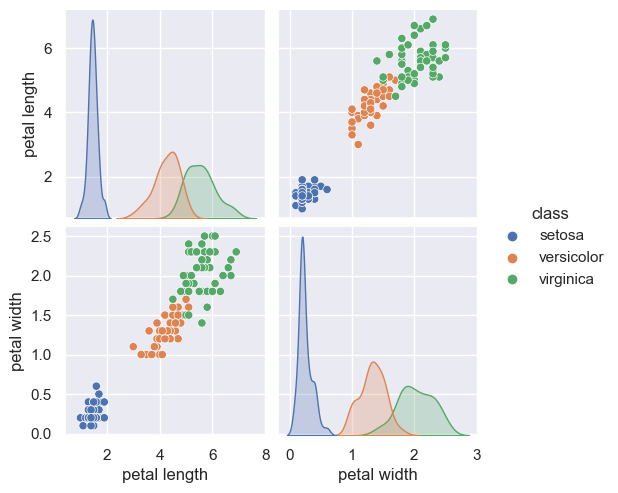

In [12]:
# Create a pairplot
sns.pairplot(petal_df, hue='class')

In [13]:
# In terms of the petals, the classes are very split apart.
# They are also all along the same correlation which will 
# result in an extremely strong positive correlation for 
# petals regardless of species.

<Axes: >

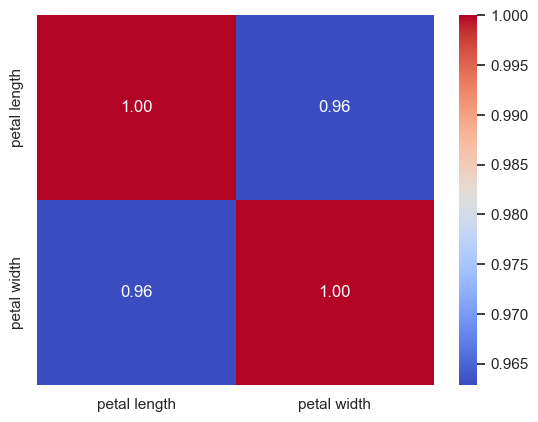

In [14]:
# Extract the subset of columns into petal_df, excluding the 'class' column
petal_stats = petal_df[['petal length', 'petal width']]

# Calculate the correlation matrix, excluding the 'class' column
correlation_petal_matrix = petal_stats.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_petal_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [15]:
# The petals have an extremely strong positive correlation
# regardless of species.

## Question 2: Choose *K* (25 pts)

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 20 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*. 

`Note:` If multiple values of *k* are found to be suitable, weigh the pros and cons of choosing a large versus a small value of *k*.

<Axes: >

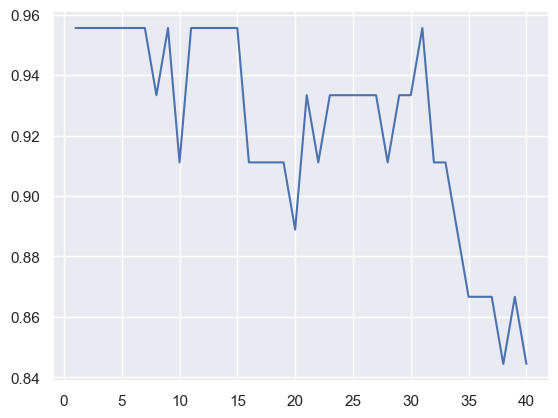

In [16]:
import numpy as np

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=7,
                                                    stratify=y
                                                    ) 

#build the k-nn model, experiment with different values of k and plot the results

# Initialize values of k
k_values = range(1, 41)  # Try k values from 1 to 40
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
sns.lineplot(x=k_values, y=accuracies)

In [17]:
# There are many suitable values from k ranging from 1 to about 31.
# I will personally go with the middle ground 15 as it will have
# some of the benefits of a low k-value, such as low bias, and 
# some of the benefits of a high k-value, such as low variance.

## Question 3: Evaluate the Results (5 pts)
Display the classification report for your recommended value of k. Evaluate the report and explain the results. 

In [18]:
#get the classification report for the best value of k
knn_15 = KNeighborsClassifier(n_neighbors = 15)
knn_15.fit(X_train, y_train)
y_pred = knn_15.predict(X_test)

target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Question 4: Model Evaluation (5 pts)
Answer the following question using a markdown cell.

1. Research the difference between accuracy, precision, and recall. For each metric, provide an example that explains when you would choose one metric over the others.
2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

`Note``: you do not need to implement code for questions 4.1 and 4.2

Accuracy provides a general measure of correctness, while precision and recall focus specifically on the performance of positive predictions, with precision emphasizing the accuracy of positive predictions and recall emphasizing the ability to capture all positive instances. So lets say that to win the lottery we have to guess a number from 1-100 that the CEO of the company is thinking of. However, sometimes the CEO thinks of negative numbers so from -100 to 100. Accuracy would be how often you can guess the correct answer from -100 to 100. Precision is how often you can guess the correct answer given that you answered from 1-100. Recall is how many times you guess the correct answer given that the CEO is thinking of a number from 1 to 100.

Accuracy: Lets say you were developing a search engine. You would want accuracy because users would prefer overall relevance of the sites popping up.

Precision: Lets say you have a program that moves spam emails to the spam folder. You would want precision because you want as least false positives as possible since you'd rather leave spam instead of accidentally deleting important emails.

Recall: Lets say you are developing a drug to detect cancer. You would want to have recall because you want as least false negatives as possible since that would leave a lot of people with cancer undetected.

Another approach to partitioning a dataset is cross-validation. Cross-validation is a resampling technique used to evaluate machine learning models by training and testing on multiple subsets of the dataset. First you divide the dataset into k equal-sized subsets. For example, if you choose k=5, the dataset will be divided into 5 equal parts. For each set, you remove that set and use the rest as the test set. Train the model on the remaining sets (the training set). Evaluate the model's performance on the set you removed. Finally, you calculate the average performance metric across all k subsets to get an overall estimate of the model's performance.

## Resources / References
Share any resources that were helpful in your response for question 4. 